B points:
0 Point2D(0, 1) ['B', 'square']
1 Point2D(1, 2) ['B', 'circle']
2 Point2D(3, 4) ['B', 'diamond']
join 0 1
  j1: (-2, 1, 0)
  j2: (-1, -1, 1)
  spread: 9/10
  meet (1/3, 2/3)
join 1 2
  j1: (-4, 2, 4)
  j2: (-2, -2, 6)
  spread: 9/10
  meet (5/3, 4/3)
join 2 0
  j1: (-1, -3, 3)
  j2: (-4, 3, 0)
  spread: 25/34
  meet (3/5, 4/5)
collinear:  True
squares area: -5/6
circles area: 2/5
diamonds area: 16/3
points:  14
       0        0 ['A', 'square'] []
       1        0 ['A', 'circle'] []
       3        0 ['A', 'diamond'] []
       0        1 ['B', 'square'] []
       1        2 ['B', 'circle'] []
      -1        0 [] [(-1, 1, -1), (0, 1, 0)]
       3        4 ['B', 'diamond'] []
     1/3      2/3 ['meet', 'diamond'] [(-1, -1, 1), (-2, 1, 0)]
     5/3      4/3 ['meet', 'square'] [(-2, -2, 6), (-4, 2, 4)]
     3/7      6/7 [] [(-1, -3, 3), (-2, 1, 0)]
     9/7      4/7 [] [(-1, -3, 3), (-4, 2, 4)]
     3/7      4/7 [] [(-4, 3, 0), (-1, -1, 1)]
     9/7     12/7 [] [(-4, 3, 0), (-2

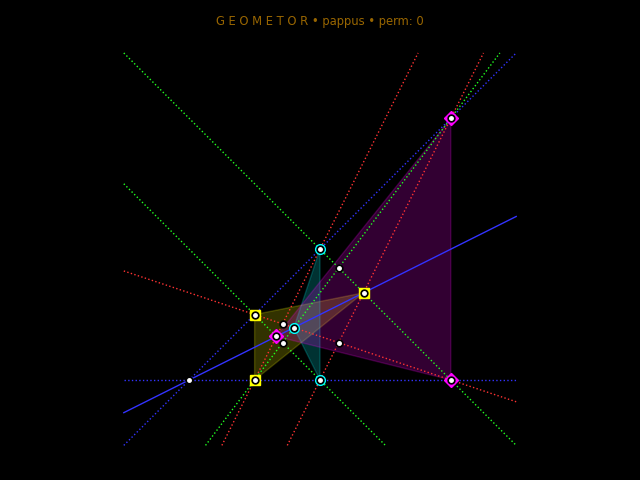

In [1]:
%run run.py
from geometor.pappus import *
from itertools import permutations

%matplotlib widget

A.append( add_point( point(0, 0, classes=['A', 'square']) ) )
A.append( add_point( point(1, 0, classes=['A', 'circle']) ) )
line_a = line(A[0], A[1], classes=['blue']) 
add_element(line_a)
x_val = 3
A.append( add_point( point(x_val, 0, classes=['A', 'diamond']) ) )
line_a.pts.append(A[-1])

B.append( add_point( point(0, 1, classes=['B']) ) )
B.append( add_point( point(1, 2, classes=['B']) ) )
line_b = line(B[0], B[1], classes=['blue']) 
add_element(line_b)
x_val = 3
y_val = line_get_y(line_b, x_val)
B.append( add_point( point(x_val, y_val, classes=['B']) ) )
line_b.pts.append(B[-1])

B_perms = list(permutations(B))

perm_id = 0
B = B_perms[perm_id]
# print(B)

# add pt types based on new permuation order
print('B points:')
for i, pt in enumerate(B):
    pt.classes.append(types[i])
    print(i, pt, pt.classes)
    
set_meet(0, 1, A, B)
set_meet(1, 2, A, B)
set_meet(2, 0, A, B)
        
meets = get_pts_by_class('meet')

if len(meets) >= 2:
    pappus_line = line(meets[0], meets[1], classes=['blue', 'pappus'])
    add_element(pappus_line)
else:
    print('no pappus line')
if len(meets) == 3:
    pappus_line.pts.append(meets[2])
    print('collinear: ', sp.Point.is_collinear(*meets))



limx, limy = get_limits_from_points(pts)
bounds = set_bounds(limx, limy)

# plt.cla()
mp.style.use('dark_background')
fig, ax = plt.subplots()

# plt_init(limx, limy)
plt.figure(num=1, figsize=(7.0, 5.0), dpi=150)
plt.gca().set_aspect('equal')

# if limx:
#     plt.gca().set_xlim(limx[0], limx[1])
# if limy:
#     plt.gca().set_ylim(limy[0], limy[1])

title = f'G E O M E T O R • pappus • perm: {perm_id}'
plt.gca().set_title(title, fontdict={'color': '#960', 'size':'small'})
plt.axis(False)
plt.tight_layout()

plot_elements(elements, bounds)

plot_points(get_pts_by_class('circle'), **classes['circle'], add_to_cursors=False)
plot_points(get_pts_by_class('square'), **classes['square'], add_to_cursors=False)
plot_points(get_pts_by_class('diamond'), **classes['diamond'], add_to_cursors=False)
plot_points(pts)

filename = f'pappus/line-{perm_id}.png'
plt.savefig(filename, dpi=300)


triangle_sq = polygon(get_pts_by_class('square'))
if isinstance(triangle_sq, spg.Triangle):
    plot_polygon(triangle_sq, color='#FF03')
    print(f'squares area: {triangle_sq.area}')
else:
    plot_segment2(triangle_sq, color='#FF09', marker='')

triangle_cir = polygon(get_pts_by_class('circle'))
if isinstance(triangle_cir, spg.Triangle):
    plot_polygon(triangle_cir, color='#0FF3')
    print(f'circles area: {triangle_cir.area}')
else:
    plot_segment2(triangle_cir, color='#0FF9', marker='')

triangle_dia = polygon(get_pts_by_class('diamond'))
if isinstance(triangle_dia, spg.Triangle):
    plot_polygon(triangle_dia, color='#F0F3')
    print(f'diamonds area: {triangle_dia.area}')
else:
    plot_segment2(triangle_dia, color='#F0F9', marker='')
    
filename = f'pappus/line-{perm_id}-tri.png'
plt.savefig(filename, dpi=300)


print('points: ', len(pts))
for pt in pts:
    print(f'{str(pt.x): >8} {str(pt.y): >8} {pt.classes} {[el.coefficients for el in pt.parents]}')
print('elements: ', len(elements))
for el in elements:
    print(f'{el.coefficients} {el.classes} ')